# Split Data for Train,Test,Val 

In [1]:
import os
import os.path
import numpy as np
import shutil
import random

root_dir = 'C:/Users/tarek/Desktop/17flowers_jpg/jpg'    #path of the original folder
                                                         #remember path should be like 'home/Desktop/flowers'
    
root_dir = root_dir+"/"
classes =  ['Buttercup', 'Daffodil', 'Sunflower', 'Cowslip', 'Windflower'] # classes



if not os.path.exists(root_dir+'train'): #check if train file exists, otherwise initiate creation of partitions
        #test,validation,training directories
    os.mkdir(root_dir +'train/')
    os.mkdir(root_dir +'val/')
    os.mkdir(root_dir +'test/')


    #create directories for each class
    for cls in classes: 
        os.makedirs(root_dir +'train/' + cls)
        os.makedirs(root_dir +'val/' + cls)
        os.makedirs(root_dir +'test/' + cls)




        #Daffodil class
    flower_type= 'Daffodil'
    for i in range(1,51) : #train data
        if i<10:
            shutil.move(root_dir +'image_000'+str(i)+'.jpg', root_dir +'/train/'+flower_type)
        if i>=10:
            shutil.move(root_dir +'image_00'+str(i)+'.jpg', root_dir +'/train/'+flower_type) 

    for i in range(51,71) : #val data
        shutil.move(root_dir +'image_00'+str(i)+'.jpg', root_dir +'/val/'+flower_type)

    for i in range(71,81) : #test data
        shutil.move(root_dir +'image_00'+str(i)+'.jpg', root_dir +'/test/'+flower_type)


        #Buttercup class
    flower_type = 'Buttercup'
    for i in range(1121,1171) : #train data
        shutil.move(root_dir +'image_'+str(i)+'.jpg', root_dir +'/train/'+flower_type)

    for i in range(1171,1191) : #val data
        shutil.move(root_dir +'image_'+str(i)+'.jpg', root_dir +'/val/'+flower_type)

    for i in range(1191,1201) : #test data
        shutil.move(root_dir +'image_'+str(i)+'.jpg', root_dir +'/test/'+flower_type)


        #Sunflower class
    flower_type = 'Sunflower'
    for i in range(721,771) : #train data
        shutil.move(root_dir +'image_0'+str(i)+'.jpg', root_dir +'/train/'+flower_type)

    for i in range(771,791) : #val data
        shutil.move(root_dir +'image_0'+str(i)+'.jpg', root_dir +'/val/'+flower_type)

    for i in range(791,801) : #test data
        shutil.move(root_dir +'image_0'+str(i)+'.jpg', root_dir +'/test/'+flower_type)


        #Cowslip class
    flower_type = 'Cowslip'
    for i in range(1041,1091) : #train data
        shutil.move(root_dir +'image_'+str(i)+'.jpg', root_dir +'/train/'+flower_type)

    for i in range(1091,1111) : #val data
        shutil.move(root_dir +'image_'+str(i)+'.jpg', root_dir +'/val/'+flower_type)

    for i in range(1111,1121) : #test data
        shutil.move(root_dir +'image_'+str(i)+'.jpg', root_dir +'/test/'+flower_type)


        #Windflower class
    flower_type = 'Windflower'
    for i in range(1201,1251) : #train data
        shutil.move(root_dir +'image_'+str(i)+'.jpg', root_dir +'/train/'+flower_type)

    for i in range(1251,1271) : #val data
        shutil.move(root_dir +'image_'+str(i)+'.jpg', root_dir +'/val/'+flower_type)

    for i in range(1271,1281) : #test data
        shutil.move(root_dir +'image_'+str(i)+'.jpg', root_dir +'/test/'+flower_type)





#  Define Generators

In [2]:
from keras.preprocessing.image import ImageDataGenerator
from keras import models
import numpy as np
import matplotlib.pyplot as plt
import os


if not root_dir is None: #if root directory is not null then assign it to base directory
    base_dir = root_dir
    
train_dir = os.path.join(base_dir,'train') 
test_dir = os.path.join(base_dir,'test')
val_dir = os.path.join(base_dir,'val')

#
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150,150), batch_size=10 #20
                                                    ,class_mode='categorical')
val_generator = test_datagen.flow_from_directory(val_dir,target_size=(150,150), batch_size=5 #20 
                                                 ,class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_dir,target_size=(150,150), batch_size=10 #20
                                                  ,class_mode='categorical'
                                                , shuffle = False
                                                    )
datagen = ImageDataGenerator(rescale=1.0/255)
batch_size =10 #20

Found 250 images belonging to 5 classes.
Found 100 images belonging to 5 classes.
Found 50 images belonging to 5 classes.


#  Test the Generators

In [3]:
import matplotlib.pyplot as plt

#print the shapes of data and labels
for data_batch , label_batch  in train_generator:
    print('data batch shape ', data_batch.shape)
    print('label batch shape ', label_batch.shape)
    print('sample data shape', data_batch[1].shape)
    print('sample 20 labels ',label_batch)
    
    break

data batch shape  (10, 150, 150, 3)
label batch shape  (10, 5)
sample data shape (150, 150, 3)
sample 20 labels  [[0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


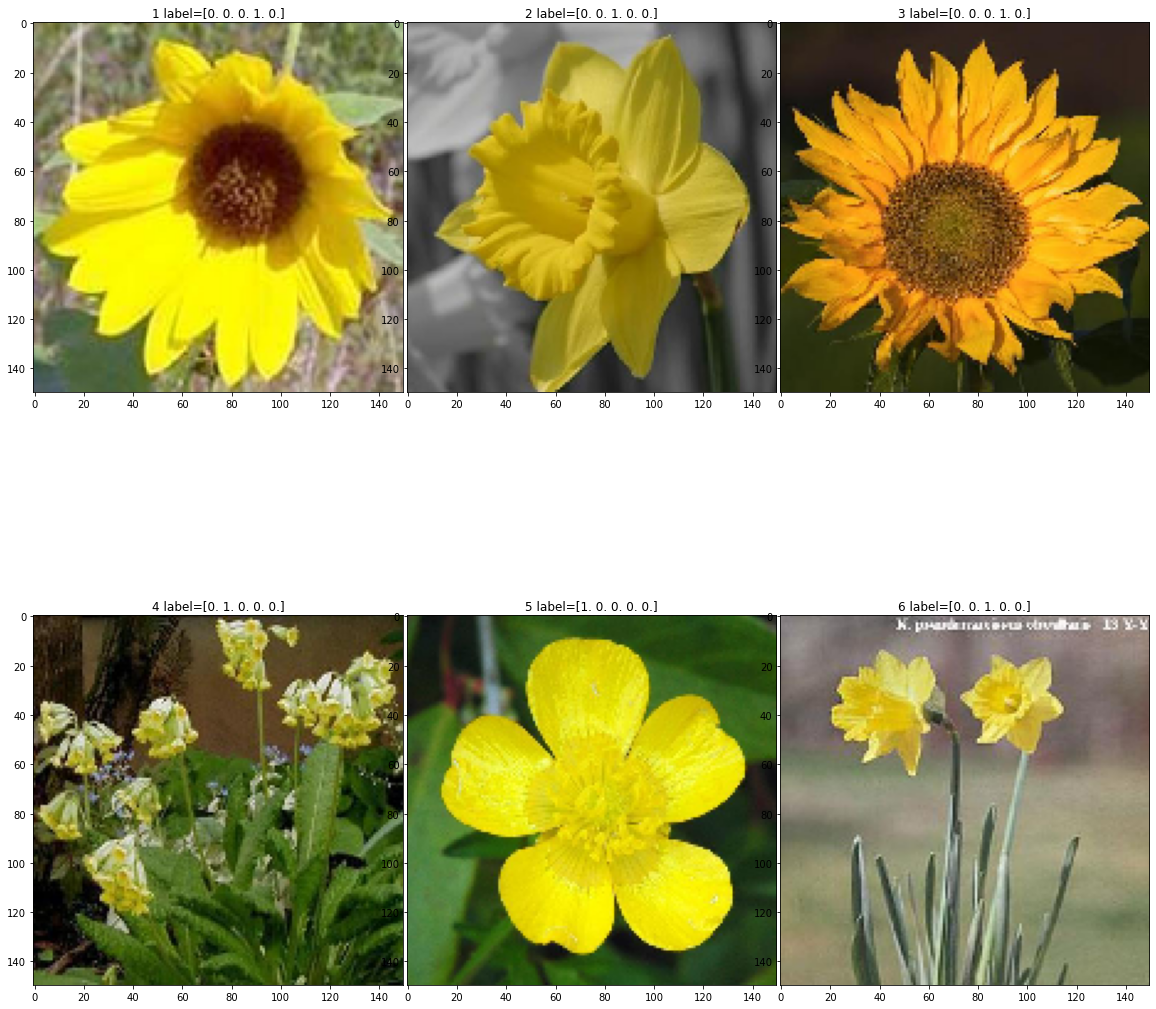

In [4]:
fig = plt.figure(figsize=(20,20))
columns = 3
rows = 2

#plot images
for i in range(1, 7):
    img = data_batch[i]
    ax = fig.add_subplot(rows, columns, i)
    plt.subplots_adjust(hspace=None, wspace = 0.01)
    ax.title.set_text(str(i)+" label=" + str(label_batch[i]))
    plt.imshow(img)
plt.show()

#  Define the network

In [5]:
from keras import models, layers

network = models.Sequential()
network.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
network.add(layers.MaxPooling2D(2,2))
network.add(layers.Conv2D(64, (3,3), activation="relu"))
network.add(layers.MaxPooling2D(2,2))
network.add(layers.Conv2D(128, (3,3), activation="relu"))
network.add(layers.MaxPooling2D(2,2))
network.add(layers.Conv2D(128, (3,3), activation="relu"))
network.add(layers.MaxPooling2D(2,2))
network.add(layers.Flatten())
network.add(layers.Dense(512,activation="relu"))
network.add(layers.Dense(5,activation='softmax')) #output

network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

#  Compile the Network

In [13]:
from tensorflow.keras import optimizers

network.compile(loss='categorical_crossentropy',optimizer = optimizers.RMSprop(learning_rate=1e-4), metrics = ['acc'])
history = network.fit(train_generator, steps_per_epoch= 10,epochs = 17,
                               validation_data=val_generator, validation_steps=10)


Epoch 1/17
10/10 [==============================] - 4s 428ms/step - loss: 0.5919 - acc: 0.7400 - val_loss: 0.9121 - val_acc: 0.6000
Epoch 2/17
10/10 [==============================] - 4s 387ms/step - loss: 0.2692 - acc: 0.9200 - val_loss: 1.0109 - val_acc: 0.5600
Epoch 3/17
10/10 [==============================] - 4s 386ms/step - loss: 0.3784 - acc: 0.8800 - val_loss: 1.0236 - val_acc: 0.6200
Epoch 4/17
10/10 [==============================] - 4s 391ms/step - loss: 0.3309 - acc: 0.8700 - val_loss: 1.0374 - val_acc: 0.6200
Epoch 5/17
10/10 [==============================] - 4s 402ms/step - loss: 0.2277 - acc: 0.9300 - val_loss: 1.0577 - val_acc: 0.6000
Epoch 6/17
10/10 [==============================] - 4s 410ms/step - loss: 0.1849 - acc: 0.9200 - val_loss: 0.6363 - val_acc: 0.8200
Epoch 7/17
10/10 [==============================] - 4s 409ms/step - loss: 0.3126 - acc: 0.8600 - val_loss: 0.9831 - val_acc: 0.6400
Epoch 8/17
10/10 [==============================] - 4s 421ms/step - loss: 0.

In [7]:
#network.save('images_output')
#from keras import models
#network = models.load_model('images_output')#from keras import models
#network = models.load_model('images_output')

# Plot the results

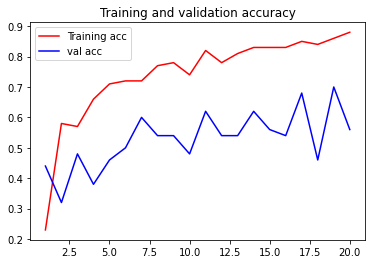

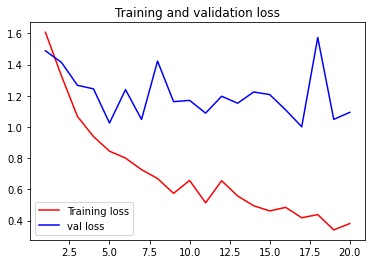

In [8]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

#plot the accuracy
plt.plot(epochs, acc, 'r', label = 'Training acc')
plt.plot(epochs, val_acc,'b',label = 'val acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()
#plot the loss
plt.plot(epochs,loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label = 'val loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

#  Accuracy on test, train and val set

In [9]:
res = network.evaluate_generator(test_generator, steps=10,verbose=1)
print('Accuracy on test set: %.3f'% res[1])

Instructions for updating:
Please use Model.evaluate, which supports generators.
 5/10 [==============>...............] - 1s 133ms/step - loss: 1.4752 - acc: 0.4200
Accuracy on test set: 0.420
